<a href="https://colab.research.google.com/github/GuoyaoShen/DiatomDL/blob/main/data_generate_allsilicone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script is for "all silicon terahertz" data

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [ ]:
# path_reflection_dir = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/all silicon terahertz_325 sets/R_'
# path_transmission_dir = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/all silicon terahertz_325 sets/T_'

# path_reflection_dir1 = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/1551_20210103/R1_'
# path_transmission_dir1 = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/1551_20210103/T1_'
# path_reflection_dir2 = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/1551_20210103/R2_'
# path_transmission_dir2 = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/1551_20210103/T2_'

path_reflection_dir1 = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/3212 sets of data/R1_'
path_transmission_dir1 = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/3212 sets of data/T1_'
path_reflection_dir2 = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/3212 sets of data/R2_'
path_transmission_dir2 = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/3212 sets of data/T2_'

NUM_SETSIZE = 130

NUM_PARAM = 18  # num of params in the file (only selected ones)

## Reflection data

In [ ]:
data_param_R1 = np.array([]).reshape(0,NUM_PARAM)
data_spectra_R1 = np.array([]).reshape(0,1001,2)

for idx_file in range(NUM_SETSIZE):
    # if idx_file == 19:
    #     continue


    path_file = path_reflection_dir1 + str(idx_file+1) + '.txt'

    # read file
    print('========================================= FILE '+str(idx_file+1)+' =========================================')
    num_combination = 0
    with open(path_file) as f:
        lines=f.readlines()

        spectra_all = np.array([]).reshape(0,1001,2)  # shape for each spectra: [1001,2]
        spectra = np.array([]).reshape(0,2)
        param_all = np.array([]).reshape(0,NUM_PARAM)

        for i, line in enumerate(lines):
            if (i%1004!=0) & (i%1004!=1) & (i%1004!=2): # read spectra data
                line_array = np.fromstring(line, dtype=float, sep=' ')
                spectra = np.vstack((spectra, line_array))

            if i%1004==0:  # every (3+1001) lines, read param title
                # param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+", line)]  # extract the float param
                param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+(?=;|})", line)]  # extract the float param
                param = np.array(param)
                # print('raw', param)
                # idx_pick = [1,3,5,7,9,11,12,13,14,16,18,20,22,24,26,28,29,30]  # only pick the chosen params
                # param = param[idx_pick]
                print(num_combination, param)
                print('------------')
                param_all = np.vstack((param_all, param))
                num_combination += 1

            if i%1004==1003:  # every end of the combination, concat
                # print(num_combination)
                spectra_all = np.concatenate((spectra_all, spectra[np.newaxis, ...]), axis=0)
                spectra = np.array([]).reshape(0,2)

        #         count = i//1004
        # if count != 24:
        #     print('******', str(idx_file+1),count)
    
    # concat data
    data_param_R1 = np.concatenate((data_param_R1, param_all), axis=0)
    data_spectra_R1 = np.concatenate((data_spectra_R1, spectra_all), axis=0)

流式输出内容被截断，只能显示最后 5000 行内容。
  10.   10.   10.   10.   61.    0. ]
------------
17 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   44.   10.
  10.   10.   10.   10.   61.    0. ]
------------
18 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   46.   10.
  10.   10.   10.   10.   61.    0. ]
------------
19 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   48.   10.
  10.   10.   10.   10.   61.    0. ]
------------
20 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   50.   10.
  10.   10.   10.   10.   61.    0. ]
------------
21 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   10.   12.
  12.   12.   12.   12.   61.    0. ]
------------
22 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   12.   12.
  12.   12.   12.   12.   61.    0. ]
------------
23 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   14.   12.
  12.   12.   12.   12.   61.    0. ]
------------
24 [ 70.   70.   70.   70.   70.   70.  

In [ ]:
print(data_param_R1.shape)
print(data_spectra_R1.shape)

(3212, 18)
(3212, 1001, 2)


In [ ]:
data_param_R2 = np.array([]).reshape(0,NUM_PARAM)
data_spectra_R2 = np.array([]).reshape(0,1001,2)

for idx_file in range(NUM_SETSIZE):
    path_file = path_reflection_dir2 + str(idx_file+1) + '.txt'

    # read file
    print('========================================= FILE '+str(idx_file+1)+' =========================================')
    num_combination = 0
    with open(path_file) as f:
        lines=f.readlines()

        spectra_all = np.array([]).reshape(0,1001,2)  # shape for each spectra: [1001,2]
        spectra = np.array([]).reshape(0,2)
        param_all = np.array([]).reshape(0,NUM_PARAM)

        for i, line in enumerate(lines):
            if (i%1004!=0) & (i%1004!=1) & (i%1004!=2): # read spectra data
                line_array = np.fromstring(line, dtype=float, sep=' ')
                spectra = np.vstack((spectra, line_array))

            if i%1004==0:  # every (3+1001) lines, read param title
                # param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+", line)]  # extract the float param
                param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+(?=;|})", line)]  # extract the float param
                param = np.array(param)
                # print('raw', param)
                # idx_pick = [1,3,5,7,9,11,12,13,14,16,18,20,22,24,26,28,29,30]  # only pick the chosen params
                # param = param[idx_pick]
                print(num_combination, param)
                print('------------')
                param_all = np.vstack((param_all, param))
                num_combination += 1

            if i%1004==1003:  # every end of the combination, concat
                # print(num_combination)
                spectra_all = np.concatenate((spectra_all, spectra[np.newaxis, ...]), axis=0)
                spectra = np.array([]).reshape(0,2)

        #         count = i//1004
        # if count != 24:
        #     print('******', str(idx_file+1),count)
    
    # concat data
    data_param_R2 = np.concatenate((data_param_R2, param_all), axis=0)
    data_spectra_R2 = np.concatenate((data_spectra_R2, spectra_all), axis=0)

流式输出内容被截断，只能显示最后 5000 行内容。
  10.   10.   10.   10.   61.    0. ]
------------
17 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   44.   10.
  10.   10.   10.   10.   61.    0. ]
------------
18 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   46.   10.
  10.   10.   10.   10.   61.    0. ]
------------
19 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   48.   10.
  10.   10.   10.   10.   61.    0. ]
------------
20 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   50.   10.
  10.   10.   10.   10.   61.    0. ]
------------
21 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   10.   12.
  12.   12.   12.   12.   61.    0. ]
------------
22 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   12.   12.
  12.   12.   12.   12.   61.    0. ]
------------
23 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   14.   12.
  12.   12.   12.   12.   61.    0. ]
------------
24 [ 70.   70.   70.   70.   70.   70.  

In [ ]:
print(data_param_R2.shape)
print(data_spectra_R2.shape)

(3212, 18)
(3212, 1001, 2)


## Transmission data

In [ ]:
data_param_T1 = np.array([]).reshape(0,NUM_PARAM)
data_spectra_T1 = np.array([]).reshape(0,1001,2)

for idx_file in range(NUM_SETSIZE):
    path_file = path_transmission_dir1 + str(idx_file+1) + '.txt'

    # read file
    print('========================================= FILE '+str(idx_file+1)+' =========================================')
    num_combination = 0
    with open(path_file) as f:
        lines=f.readlines()

        spectra_all = np.array([]).reshape(0,1001,2)  # shape for each spectra: [1001,2]
        spectra = np.array([]).reshape(0,2)
        param_all = np.array([]).reshape(0,NUM_PARAM)

        for i, line in enumerate(lines):
            if (i%1004!=0) & (i%1004!=1) & (i%1004!=2): # read spectra data
                line_array = np.fromstring(line, dtype=float, sep=' ')
                spectra = np.vstack((spectra, line_array))

            if i%1004==0:  # every (3+1001) lines, read param title
                # param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+", line)]  # extract the float param
                param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+(?=;|})", line)]  # extract the float param
                param = np.array(param)
                # print('raw', param)
                # idx_pick = [1,3,5,7,9,11,12,13,14,16,18,20,22,24,26,28,29,30]  # only pick the chosen params
                # param = param[idx_pick]
                print(num_combination, param)
                print('------------')
                param_all = np.vstack((param_all, param))
                num_combination += 1

            if i%1004==1003:  # every end of the combination, concat
                # print(num_combination)
                spectra_all = np.concatenate((spectra_all, spectra[np.newaxis, ...]), axis=0)
                spectra = np.array([]).reshape(0,2)

        #         count = i//1004
        # if count != 24:
        #     print('******', str(idx_file+1),count)

    
    # concat data
    data_param_T1 = np.concatenate((data_param_T1, param_all), axis=0)
    data_spectra_T1 = np.concatenate((data_spectra_T1, spectra_all), axis=0)

流式输出内容被截断，只能显示最后 5000 行内容。
  10.   10.   10.   10.   61.    0. ]
------------
17 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   44.   10.
  10.   10.   10.   10.   61.    0. ]
------------
18 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   46.   10.
  10.   10.   10.   10.   61.    0. ]
------------
19 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   48.   10.
  10.   10.   10.   10.   61.    0. ]
------------
20 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   50.   10.
  10.   10.   10.   10.   61.    0. ]
------------
21 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   10.   12.
  12.   12.   12.   12.   61.    0. ]
------------
22 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   12.   12.
  12.   12.   12.   12.   61.    0. ]
------------
23 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   14.   12.
  12.   12.   12.   12.   61.    0. ]
------------
24 [ 70.   70.   70.   70.   70.   70.  

In [ ]:
print(data_param_T1.shape)
print(data_spectra_T1.shape)

(3212, 18)
(3212, 1001, 2)


In [ ]:
data_param_T2 = np.array([]).reshape(0,NUM_PARAM)
data_spectra_T2 = np.array([]).reshape(0,1001,2)

for idx_file in range(NUM_SETSIZE):
    path_file = path_transmission_dir2 + str(idx_file+1) + '.txt'

    # read file
    print('========================================= FILE '+str(idx_file+1)+' =========================================')
    num_combination = 0
    with open(path_file) as f:
        lines=f.readlines()

        spectra_all = np.array([]).reshape(0,1001,2)  # shape for each spectra: [1001,2]
        spectra = np.array([]).reshape(0,2)
        param_all = np.array([]).reshape(0,NUM_PARAM)

        for i, line in enumerate(lines):
            if (i%1004!=0) & (i%1004!=1) & (i%1004!=2): # read spectra data
                line_array = np.fromstring(line, dtype=float, sep=' ')
                spectra = np.vstack((spectra, line_array))

            if i%1004==0:  # every (3+1001) lines, read param title
                # param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+", line)]  # extract the float param
                param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+(?=;|})", line)]  # extract the float param
                param = np.array(param)
                # print('raw', param)
                # idx_pick = [1,3,5,7,9,11,12,13,14,16,18,20,22,24,26,28,29,30]  # only pick the chosen params
                # param = param[idx_pick]
                print(num_combination, param)
                print('------------')
                param_all = np.vstack((param_all, param))
                num_combination += 1

            if i%1004==1003:  # every end of the combination, concat
                # print(num_combination)
                spectra_all = np.concatenate((spectra_all, spectra[np.newaxis, ...]), axis=0)
                spectra = np.array([]).reshape(0,2)

        #         count = i//1004
        # if count != 24:
        #     print('******', str(idx_file+1),count)

    
    # concat data
    data_param_T2 = np.concatenate((data_param_T2, param_all), axis=0)
    data_spectra_T2 = np.concatenate((data_spectra_T2, spectra_all), axis=0)

流式输出内容被截断，只能显示最后 5000 行内容。
  10.   10.   10.   10.   61.    0. ]
------------
17 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   44.   10.
  10.   10.   10.   10.   61.    0. ]
------------
18 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   46.   10.
  10.   10.   10.   10.   61.    0. ]
------------
19 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   48.   10.
  10.   10.   10.   10.   61.    0. ]
------------
20 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   10.   50.   10.
  10.   10.   10.   10.   61.    0. ]
------------
21 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   10.   12.
  12.   12.   12.   12.   61.    0. ]
------------
22 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   12.   12.
  12.   12.   12.   12.   61.    0. ]
------------
23 [ 70.   70.   70.   70.   70.   70.    0.  346.4 200.   12.   14.   12.
  12.   12.   12.   12.   61.    0. ]
------------
24 [ 70.   70.   70.   70.   70.   70.  

In [ ]:
print(data_param_T2.shape)
print(data_spectra_T2.shape)

(3212, 18)
(3212, 1001, 2)


In [ ]:
# double check param array

print(np.any([[True, False], [False, False]]))
print(np.any([[False, False], [False, False]]))
print('---')

print(np.any(data_param_T1 - data_param_R1))  # if this is false, then correct
print(np.any(data_param_T1 - data_param_R2))
print(np.any(data_param_T1 - data_param_T2))

# print((data_param_R2 - data_param_R1).shape)
# print(np.argwhere(data_param_T1 - data_param_R1))

True
False
---
False
False
False


# Check Params Range

In [ ]:
# d = data_param_T[...,1]
# p = data_param_T[...,3]
# t_top = data_param_T[...,8]

# print('d min:', min(d))
# print('d max:', max(d))
# print('--------------------')
# print('p min:', min(p))
# print('p max:', max(p))
# print('--------------------')
# print('t_top min:', min(t_top))
# print('t_top max:', max(t_top))

# Save Data

In [ ]:
# path_dataset = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/allsilicone_325.npz'
path_dataset = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/allsilicone_r1r2r7_3212.npz'

np.savez(path_dataset, param=data_param_T1, R1=data_spectra_R1, R2=data_spectra_R2, T1=data_spectra_T1, T2=data_spectra_T2)

print('DATASET SAVED')

DATASET SAVED


In [ ]:
data = np.load(path_dataset)
print(data['param'].shape)
print(data['R1'].shape)
print(data['T1'].shape)
print(data['R1'][0])
print(data['T1'][0])

(3212, 18)
(3212, 1001, 2)
(3212, 1001, 2)
[[0.5        0.7195911 ]
 [0.501      0.71894922]
 [0.502      0.71829784]
 ...
 [1.498      0.15370129]
 [1.499      0.15226866]
 [1.5        0.15100287]]
[[0.5        0.54685509]
 [0.501      0.54749198]
 [0.502      0.54813256]
 ...
 [1.498      0.8101815 ]
 [1.499      0.81033432]
 [1.5        0.81046313]]


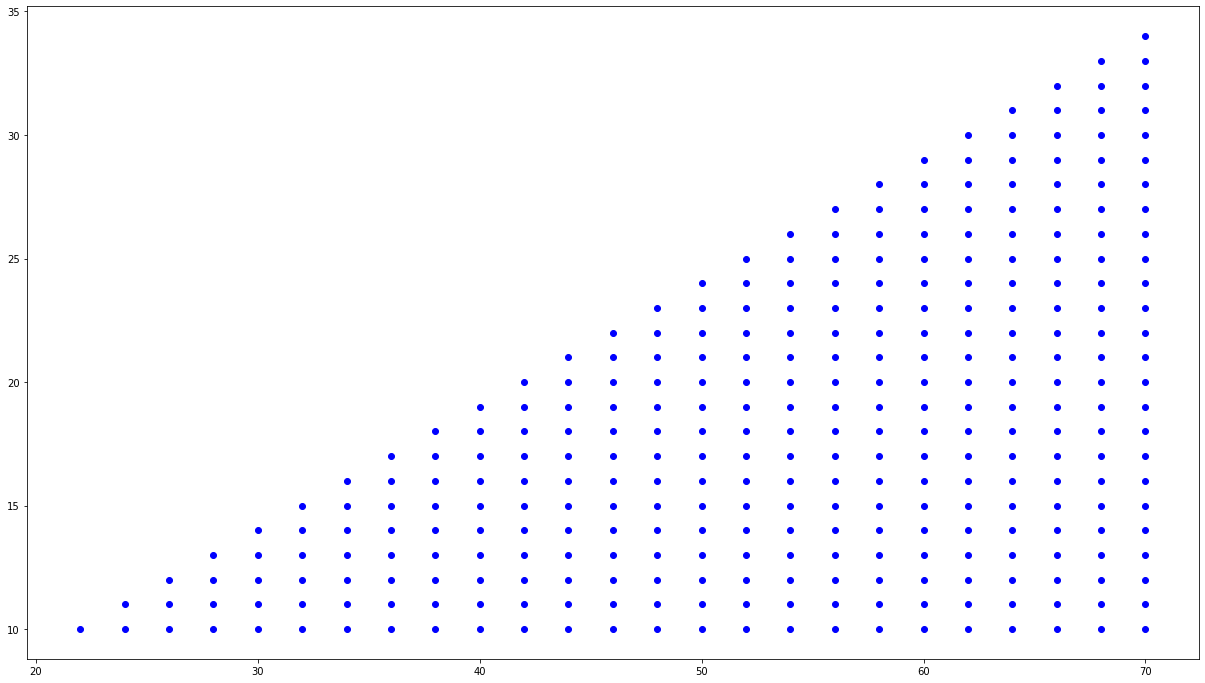

In [ ]:
# p = data_param_T[:,0]
# r = data_param_T[:,4]

# plt.figure(1, figsize=(21,12))
# plt.scatter(p, r, c='b')